In [2]:
import pandas as pd

In [3]:
dataEnem = pd.read_csv('../MICRODADOS_ENEM_2023.csv', sep=';', encoding='latin1')

In [3]:
# Criando a coluna 'PRESENCA_COMPLETA' com base na presença em todas as provas
dataEnem['PRESENCA_COMPLETA'] = dataEnem.apply(
    lambda row: 1 if (
        row['TP_PRESENCA_CN'] == 1 and
        row['TP_PRESENCA_CH'] == 1 and
        row['TP_PRESENCA_LC'] == 1 and
        row['TP_PRESENCA_MT'] == 1
    ) else 0,
    axis=1
)

In [4]:
# Função para agrupar faixa etária
def agrupar_faixa_etaria(faixa):
    if faixa <= 5:
        return 1 # Jovens (17-20)
    elif faixa <= 10:
        return 2 # Jovens Adultos (21-25)
    elif faixa <= 16:
        return 3 # Adultos (26-55)
    else:
        return 4 # Idosos (56 Acima)

# Aplicando a função para criar a nova coluna
dataEnem['GRUPO_ETARIO'] = dataEnem['TP_FAIXA_ETARIA'].apply(agrupar_faixa_etaria)

In [5]:
dados_filtrados = dataEnem.filter(items=['TP_ST_CONCLUSAO', 'TP_SEXO', 'IN_TREINERO', 'TP_ESCOLA', 'SG_UF_PROVA', 'GRUPO_ETARIO', 'PRESENCA_COMPLETA', 'Q006', 'Q010', 'Q011'])

In [7]:
from sklearn.preprocessing import LabelEncoder
colunas_object = dados_filtrados.select_dtypes(include=['object']).columns
print("Colunas do tipo object:", colunas_object)

# Codificar colunas categóricas com LabelEncoder
le = LabelEncoder()
for col in colunas_object:
    dados_filtrados[col] = le.fit_transform(dados_filtrados[col])

Colunas do tipo object: Index(['TP_SEXO', 'SG_UF_PROVA', 'Q006', 'Q010', 'Q011'], dtype='object')


In [9]:
dados_filtrados.to_csv('dadosFiltradosEnem.csv', index=False)

In [10]:
corr = dados_filtrados.corr()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

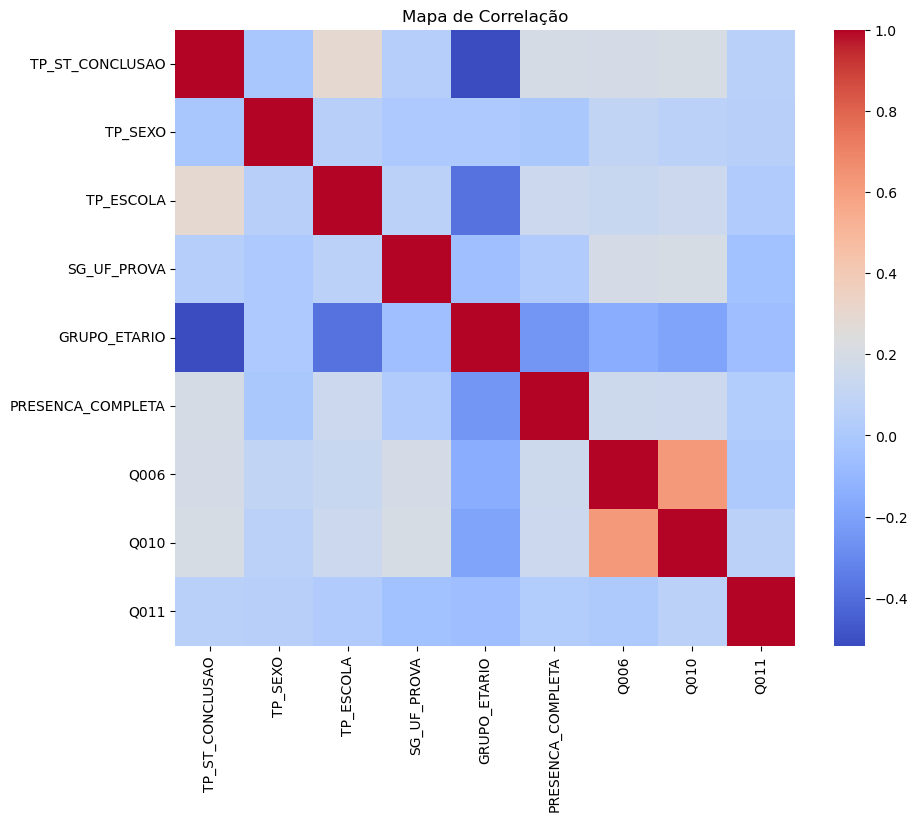

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()